In [1]:
# import package
# installed via pip
from emtracks.particle import trajectory_solver # main solver object
from emtracks.conversions import one_gev_c2_to_kg # conversion for q factor (transverse momentum estimate)
from emtracks.tools import *#InitConds # initial conditions namedtuple
from emtracks.mapinterp import get_df_interp_func  # factory function for creating Mu2e DS interpolation function
from emtracks.Bdist import get_B_df_distorted
from emtracks.interpolations import *
import matplotlib.animation as animation
import numpy as np
from scipy.constants import c, elementary_charge
import pandas as pd
import pickle as pkl
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = [24,16] # bigger figures
from matplotlib import style
style.use('fivethirtyeight')
import os

from joblib import Parallel, delayed
import multiprocessing
from tqdm.notebook import tqdm

testdir = "/home/darren/Desktop/plots/"
datadir = "/home/shared_data/"
plotdir = datadir+"plots/randomphi/"
mapdir = datadir+"Bmaps/"
date = "/7-9/"
newdir = datadir+'testmao/'

maomapdir = '/home/shared_data/Bmaps/Mau10/combined/'

ERROR! Please set $EMTRACKS_DDIR and $EMTRACKS_PDIR. Setting defaults (current directory)


In [2]:
files = sorted(os.listdir(newdir))
e_solvernom = trajectory_solver.from_pickle(newdir+files[0])
f = interp_cole(e_solvernom.dataframe, 13)

In [34]:

12.0
e_solvernom = trajectory_solver.from_pickle(newdir+'0.00_1.154_0.000_0.054_.pkl')
e_solvernom.dataframe

,t,x,y,z,px,py,pz,pT,p,E,beta,v,vx,vy,vz,theta,phi,r,rfromcenter
0,0.000000e+00,0.054094,0.038730,5.988901,95.976749,0.000000,42.486060,95.976749,104.96,104.961244,0.999988,2.997889e+08,2.741308e+08,0.000000e+00,1.213496e+08,1.154054,0.000000,0.066530,0.066530
1,4.000000e-12,0.055191,0.038733,5.989386,95.976290,0.470944,42.484487,95.977445,104.96,104.961244,0.999988,2.997889e+08,2.741294e+08,1.345119e+06,1.213451e+08,1.154071,0.004907,0.067426,0.067426
2,8.000000e-12,0.056288,0.038741,5.989872,95.973515,0.941820,42.482926,95.978136,104.96,104.961244,0.999988,2.997889e+08,2.741215e+08,2.690044e+06,1.213406e+08,1.154087,0.009813,0.068331,0.068331
3,1.200000e-11,0.057384,0.038755,5.990357,95.968425,1.412617,42.481378,95.978821,104.96,104.961244,0.999988,2.997889e+08,2.741070e+08,4.034745e+06,1.213362e+08,1.154103,0.014719,0.069245,0.069245
4,1.600000e-11,0.058480,0.038773,5.990842,95.961021,1.883324,42.479844,95.979500,104.96,104.961244,0.999988,2.997889e+08,2.740858e+08,5.379187e+06,1.213318e+08,1.154119,0.019623,0.070166,0.070166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,3.998400e-08,-0.120886,0.113169,12.873289,63.193207,-53.613807,64.411024,82.872321,104.96,104.961244,0.999988,2.997889e+08,1.804937e+08,-1.531329e+08,1.839721e+08,0.910093,-0.703571,0.165592,0.165592
9997,3.998800e-08,-0.120163,0.112558,12.874025,63.374011,-53.400023,64.410976,82.872358,104.96,104.961244,0.999988,2.997889e+08,1.810102e+08,-1.525222e+08,1.839720e+08,0.910094,-0.700192,0.164646,0.164646
9998,3.999200e-08,-0.119438,0.111949,12.874761,63.554088,-53.185638,64.410926,82.872397,104.96,104.961244,0.999988,2.997889e+08,1.815245e+08,-1.519099e+08,1.839718e+08,0.910094,-0.696814,0.163701,0.163701
9999,3.999600e-08,-0.118711,0.111343,12.875497,63.733436,-52.970652,64.410875,82.872437,104.96,104.961244,0.999988,2.997889e+08,1.820367e+08,-1.512959e+08,1.839717e+08,0.910095,-0.693435,0.162756,0.162756


In [22]:
file = files[6]
zsteps = np.linspace(6, 13, 8)
data = []
x = file.split('_')
field = x[0]
e_solvernom = trajectory_solver.from_pickle(newdir+file)
phi = e_solvernom.init_conds.phi0
theta = e_solvernom.init_conds.theta0
for z in zsteps:
    info = interp_cole(e_solvernom.dataframe, z)
    x = info[1]
    y = info[2]
    r = tuple([(x**2 + y**2)**(1/2)])

    tuple1 = (z, field, theta, phi)
    data.append(tuple1 + info + r)
data

[(6.0,
  '0.00',
  0.0,
  0.7693696294505615,
  3.7023121813625595e-11,
  0.05409534957954967,
  0.038729025124246724,
  0.06653002505041028),
 (7.0,
  '0.00',
  0.0,
  0.7693696294505615,
  3.3728667860937985e-09,
  0.06229825989584864,
  0.040071463659249955,
  0.07407290588228123),
 (8.0,
  '0.00',
  0.0,
  0.7693696294505615,
  6.708632571716033e-09,
  0.06353718626336378,
  0.04455040193525627,
  0.07759969298172686),
 (9.0,
  '0.00',
  0.0,
  0.7693696294505615,
  1.0044375391787497e-08,
  0.06758700486318674,
  0.046690289666981515,
  0.08214612818364032),
 (10.0,
  '0.00',
  0.0,
  0.7693696294505615,
  1.3380114165569202e-08,
  0.06375990218868492,
  0.04615395126312744,
  0.07871157693954436),
 (11.0,
  '0.00',
  0.0,
  0.7693696294505615,
  1.671586008283213e-08,
  0.06823147995901895,
  0.046009421155775575,
  0.08229460305808355),
 (12.0,
  '0.00',
  0.0,
  0.7693696294505615,
  2.005159455026879e-08,
  0.06481072865253863,
  0.0476819846570015,
  0.08046118448856888),
 (1

In [28]:
def readpkl(zstart, zend, numpoints):
    files = sorted(os.listdir(newdir))
    zsteps = np.linspace(zstart, zend, numpoints)
    data = []

    for file in files:
        x = file.split('_')
        field = x[0]
        e_solvernom = trajectory_solver.from_pickle(newdir+file)
        phi = e_solvernom.init_conds.phi0
        theta = e_solvernom.init_conds.theta0
        for z in zsteps:
            info = interp_cole(e_solvernom.dataframe, z)
            x = info[1]
            y = info[2]
            r = tuple([(x**2 + y**2)**(1/2)])

            tuple1 = (z, field, theta, phi)
            data.append(tuple1 + info + r)
            
            print(file)
            print(z)
            
    return data

In [29]:
x = readpkl(6, 13, 8)
df = pd.DataFrame(x, columns = ['z', 'field', 'theta', 'phi', 't', 'x', 'y', 'r'])

0.00_0.000_0.000_0.054_.pkl
6.0
0.00_0.000_0.000_0.054_.pkl
7.0
0.00_0.000_0.000_0.054_.pkl
8.0
0.00_0.000_0.000_0.054_.pkl
9.0
0.00_0.000_0.000_0.054_.pkl
10.0
0.00_0.000_0.000_0.054_.pkl
11.0
0.00_0.000_0.000_0.054_.pkl
12.0
0.00_0.000_0.000_0.054_.pkl
13.0
0.00_0.000_0.128_0.054_.pkl
6.0
0.00_0.000_0.128_0.054_.pkl
7.0
0.00_0.000_0.128_0.054_.pkl
8.0
0.00_0.000_0.128_0.054_.pkl
9.0
0.00_0.000_0.128_0.054_.pkl
10.0
0.00_0.000_0.128_0.054_.pkl
11.0
0.00_0.000_0.128_0.054_.pkl
12.0
0.00_0.000_0.128_0.054_.pkl
13.0
0.00_0.000_0.256_0.054_.pkl
6.0
0.00_0.000_0.256_0.054_.pkl
7.0
0.00_0.000_0.256_0.054_.pkl
8.0
0.00_0.000_0.256_0.054_.pkl
9.0
0.00_0.000_0.256_0.054_.pkl
10.0
0.00_0.000_0.256_0.054_.pkl
11.0
0.00_0.000_0.256_0.054_.pkl
12.0
0.00_0.000_0.256_0.054_.pkl
13.0
0.00_0.000_0.385_0.054_.pkl
6.0
0.00_0.000_0.385_0.054_.pkl
7.0
0.00_0.000_0.385_0.054_.pkl
8.0
0.00_0.000_0.385_0.054_.pkl
9.0
0.00_0.000_0.385_0.054_.pkl
10.0
0.00_0.000_0.385_0.054_.pkl
11.0
0.00_0.000_0.385_0.054_.pk

0.00_0.064_1.154_0.054_.pkl
13.0
0.00_0.064_1.282_0.054_.pkl
6.0
0.00_0.064_1.282_0.054_.pkl
7.0
0.00_0.064_1.282_0.054_.pkl
8.0
0.00_0.064_1.282_0.054_.pkl
9.0
0.00_0.064_1.282_0.054_.pkl
10.0
0.00_0.064_1.282_0.054_.pkl
11.0
0.00_0.064_1.282_0.054_.pkl
12.0
0.00_0.064_1.282_0.054_.pkl
13.0
0.00_0.064_1.411_0.054_.pkl
6.0
0.00_0.064_1.411_0.054_.pkl
7.0
0.00_0.064_1.411_0.054_.pkl
8.0
0.00_0.064_1.411_0.054_.pkl
9.0
0.00_0.064_1.411_0.054_.pkl
10.0
0.00_0.064_1.411_0.054_.pkl
11.0
0.00_0.064_1.411_0.054_.pkl
12.0
0.00_0.064_1.411_0.054_.pkl
13.0
0.00_0.064_1.539_0.054_.pkl
6.0
0.00_0.064_1.539_0.054_.pkl
7.0
0.00_0.064_1.539_0.054_.pkl
8.0
0.00_0.064_1.539_0.054_.pkl
9.0
0.00_0.064_1.539_0.054_.pkl
10.0
0.00_0.064_1.539_0.054_.pkl
11.0
0.00_0.064_1.539_0.054_.pkl
12.0
0.00_0.064_1.539_0.054_.pkl
13.0
0.00_0.064_1.667_0.054_.pkl
6.0
0.00_0.064_1.667_0.054_.pkl
7.0
0.00_0.064_1.667_0.054_.pkl
8.0
0.00_0.064_1.667_0.054_.pkl
9.0
0.00_0.064_1.667_0.054_.pkl
10.0
0.00_0.064_1.667_0.054_.pk

0.00_0.128_2.565_0.054_.pkl
6.0
0.00_0.128_2.565_0.054_.pkl
7.0
0.00_0.128_2.565_0.054_.pkl
8.0
0.00_0.128_2.565_0.054_.pkl
9.0
0.00_0.128_2.565_0.054_.pkl
10.0
0.00_0.128_2.565_0.054_.pkl
11.0
0.00_0.128_2.565_0.054_.pkl
12.0
0.00_0.128_2.565_0.054_.pkl
13.0
0.00_0.128_2.693_0.054_.pkl
6.0
0.00_0.128_2.693_0.054_.pkl
7.0
0.00_0.128_2.693_0.054_.pkl
8.0
0.00_0.128_2.693_0.054_.pkl
9.0
0.00_0.128_2.693_0.054_.pkl
10.0
0.00_0.128_2.693_0.054_.pkl
11.0
0.00_0.128_2.693_0.054_.pkl
12.0
0.00_0.128_2.693_0.054_.pkl
13.0
0.00_0.128_2.821_0.054_.pkl
6.0
0.00_0.128_2.821_0.054_.pkl
7.0
0.00_0.128_2.821_0.054_.pkl
8.0
0.00_0.128_2.821_0.054_.pkl
9.0
0.00_0.128_2.821_0.054_.pkl
10.0
0.00_0.128_2.821_0.054_.pkl
11.0
0.00_0.128_2.821_0.054_.pkl
12.0
0.00_0.128_2.821_0.054_.pkl
13.0
0.00_0.128_2.949_0.054_.pkl
6.0
0.00_0.128_2.949_0.054_.pkl
7.0
0.00_0.128_2.949_0.054_.pkl
8.0
0.00_0.128_2.949_0.054_.pkl
9.0
0.00_0.128_2.949_0.054_.pkl
10.0
0.00_0.128_2.949_0.054_.pkl
11.0
0.00_0.128_2.949_0.054_.pk

0.00_0.192_3.847_0.054_.pkl
7.0
0.00_0.192_3.847_0.054_.pkl
8.0
0.00_0.192_3.847_0.054_.pkl
9.0
0.00_0.192_3.847_0.054_.pkl
10.0
0.00_0.192_3.847_0.054_.pkl
11.0
0.00_0.192_3.847_0.054_.pkl
12.0
0.00_0.192_3.847_0.054_.pkl
13.0
0.00_0.192_3.975_0.054_.pkl
6.0
0.00_0.192_3.975_0.054_.pkl
7.0
0.00_0.192_3.975_0.054_.pkl
8.0
0.00_0.192_3.975_0.054_.pkl
9.0
0.00_0.192_3.975_0.054_.pkl
10.0
0.00_0.192_3.975_0.054_.pkl
11.0
0.00_0.192_3.975_0.054_.pkl
12.0
0.00_0.192_3.975_0.054_.pkl
13.0
0.00_0.192_4.103_0.054_.pkl
6.0
0.00_0.192_4.103_0.054_.pkl
7.0
0.00_0.192_4.103_0.054_.pkl
8.0
0.00_0.192_4.103_0.054_.pkl
9.0
0.00_0.192_4.103_0.054_.pkl
10.0
0.00_0.192_4.103_0.054_.pkl
11.0
0.00_0.192_4.103_0.054_.pkl
12.0
0.00_0.192_4.103_0.054_.pkl
13.0
0.00_0.192_4.232_0.054_.pkl
6.0
0.00_0.192_4.232_0.054_.pkl
7.0
0.00_0.192_4.232_0.054_.pkl
8.0
0.00_0.192_4.232_0.054_.pkl
9.0
0.00_0.192_4.232_0.054_.pkl
10.0
0.00_0.192_4.232_0.054_.pkl
11.0
0.00_0.192_4.232_0.054_.pkl
12.0
0.00_0.192_4.232_0.054_.p

0.00_0.256_5.001_0.054_.pkl
6.0
0.00_0.256_5.001_0.054_.pkl
7.0
0.00_0.256_5.001_0.054_.pkl
8.0
0.00_0.256_5.001_0.054_.pkl
9.0
0.00_0.256_5.001_0.054_.pkl
10.0
0.00_0.256_5.001_0.054_.pkl
11.0
0.00_0.256_5.001_0.054_.pkl
12.0
0.00_0.256_5.001_0.054_.pkl
13.0
0.00_0.256_5.129_0.054_.pkl
6.0
0.00_0.256_5.129_0.054_.pkl
7.0
0.00_0.256_5.129_0.054_.pkl
8.0
0.00_0.256_5.129_0.054_.pkl
9.0
0.00_0.256_5.129_0.054_.pkl
10.0
0.00_0.256_5.129_0.054_.pkl
11.0
0.00_0.256_5.129_0.054_.pkl
12.0
0.00_0.256_5.129_0.054_.pkl
13.0
0.00_0.256_5.257_0.054_.pkl
6.0
0.00_0.256_5.257_0.054_.pkl
7.0
0.00_0.256_5.257_0.054_.pkl
8.0
0.00_0.256_5.257_0.054_.pkl
9.0
0.00_0.256_5.257_0.054_.pkl
10.0
0.00_0.256_5.257_0.054_.pkl
11.0
0.00_0.256_5.257_0.054_.pkl
12.0
0.00_0.256_5.257_0.054_.pkl
13.0
0.00_0.256_5.386_0.054_.pkl
6.0
0.00_0.256_5.386_0.054_.pkl
7.0
0.00_0.256_5.386_0.054_.pkl
8.0
0.00_0.256_5.386_0.054_.pkl
9.0
0.00_0.256_5.386_0.054_.pkl
10.0
0.00_0.256_5.386_0.054_.pkl
11.0
0.00_0.256_5.386_0.054_.pk

0.00_0.321_6.155_0.054_.pkl
9.0
0.00_0.321_6.155_0.054_.pkl
10.0
0.00_0.321_6.155_0.054_.pkl
11.0
0.00_0.321_6.155_0.054_.pkl
12.0
0.00_0.321_6.155_0.054_.pkl
13.0
0.00_0.321_6.283_0.054_.pkl
6.0
0.00_0.321_6.283_0.054_.pkl
7.0
0.00_0.321_6.283_0.054_.pkl
8.0
0.00_0.321_6.283_0.054_.pkl
9.0
0.00_0.321_6.283_0.054_.pkl
10.0
0.00_0.321_6.283_0.054_.pkl
11.0
0.00_0.321_6.283_0.054_.pkl
12.0
0.00_0.321_6.283_0.054_.pkl
13.0
0.00_0.385_0.000_0.054_.pkl
6.0
0.00_0.385_0.000_0.054_.pkl
7.0
0.00_0.385_0.000_0.054_.pkl
8.0
0.00_0.385_0.000_0.054_.pkl
9.0
0.00_0.385_0.000_0.054_.pkl
10.0
0.00_0.385_0.000_0.054_.pkl
11.0
0.00_0.385_0.000_0.054_.pkl
12.0
0.00_0.385_0.000_0.054_.pkl
13.0
0.00_0.385_0.128_0.054_.pkl
6.0
0.00_0.385_0.128_0.054_.pkl
7.0
0.00_0.385_0.128_0.054_.pkl
8.0
0.00_0.385_0.128_0.054_.pkl
9.0
0.00_0.385_0.128_0.054_.pkl
10.0
0.00_0.385_0.128_0.054_.pkl
11.0
0.00_0.385_0.128_0.054_.pkl
12.0
0.00_0.385_0.128_0.054_.pkl
13.0
0.00_0.385_0.256_0.054_.pkl
6.0
0.00_0.385_0.256_0.054_.

0.00_0.449_0.641_0.054_.pkl
9.0
0.00_0.449_0.641_0.054_.pkl
10.0
0.00_0.449_0.641_0.054_.pkl
11.0
0.00_0.449_0.641_0.054_.pkl
12.0
0.00_0.449_0.641_0.054_.pkl
13.0
0.00_0.449_0.769_0.054_.pkl
6.0
0.00_0.449_0.769_0.054_.pkl
7.0
0.00_0.449_0.769_0.054_.pkl
8.0
0.00_0.449_0.769_0.054_.pkl
9.0
0.00_0.449_0.769_0.054_.pkl
10.0
0.00_0.449_0.769_0.054_.pkl
11.0
0.00_0.449_0.769_0.054_.pkl
12.0
0.00_0.449_0.769_0.054_.pkl
13.0
0.00_0.449_0.898_0.054_.pkl
6.0
0.00_0.449_0.898_0.054_.pkl
7.0
0.00_0.449_0.898_0.054_.pkl
8.0
0.00_0.449_0.898_0.054_.pkl
9.0
0.00_0.449_0.898_0.054_.pkl
10.0
0.00_0.449_0.898_0.054_.pkl
11.0
0.00_0.449_0.898_0.054_.pkl
12.0
0.00_0.449_0.898_0.054_.pkl
13.0
0.00_0.449_1.026_0.054_.pkl
6.0
0.00_0.449_1.026_0.054_.pkl
7.0
0.00_0.449_1.026_0.054_.pkl
8.0
0.00_0.449_1.026_0.054_.pkl
9.0
0.00_0.449_1.026_0.054_.pkl
10.0
0.00_0.449_1.026_0.054_.pkl
11.0
0.00_0.449_1.026_0.054_.pkl
12.0
0.00_0.449_1.026_0.054_.pkl
13.0
0.00_0.449_1.154_0.054_.pkl
6.0
0.00_0.449_1.154_0.054_.

0.00_0.513_1.923_0.054_.pkl
6.0
0.00_0.513_1.923_0.054_.pkl
7.0
0.00_0.513_1.923_0.054_.pkl
8.0
0.00_0.513_1.923_0.054_.pkl
9.0
0.00_0.513_1.923_0.054_.pkl
10.0
0.00_0.513_1.923_0.054_.pkl
11.0
0.00_0.513_1.923_0.054_.pkl
12.0
0.00_0.513_1.923_0.054_.pkl
13.0
0.00_0.513_2.052_0.054_.pkl
6.0
0.00_0.513_2.052_0.054_.pkl
7.0
0.00_0.513_2.052_0.054_.pkl
8.0
0.00_0.513_2.052_0.054_.pkl
9.0
0.00_0.513_2.052_0.054_.pkl
10.0
0.00_0.513_2.052_0.054_.pkl
11.0
0.00_0.513_2.052_0.054_.pkl
12.0
0.00_0.513_2.052_0.054_.pkl
13.0
0.00_0.513_2.180_0.054_.pkl
6.0
0.00_0.513_2.180_0.054_.pkl
7.0
0.00_0.513_2.180_0.054_.pkl
8.0
0.00_0.513_2.180_0.054_.pkl
9.0
0.00_0.513_2.180_0.054_.pkl
10.0
0.00_0.513_2.180_0.054_.pkl
11.0
0.00_0.513_2.180_0.054_.pkl
12.0
0.00_0.513_2.180_0.054_.pkl
13.0
0.00_0.513_2.308_0.054_.pkl
6.0
0.00_0.513_2.308_0.054_.pkl
7.0
0.00_0.513_2.308_0.054_.pkl
8.0
0.00_0.513_2.308_0.054_.pkl
9.0
0.00_0.513_2.308_0.054_.pkl
10.0
0.00_0.513_2.308_0.054_.pkl
11.0
0.00_0.513_2.308_0.054_.pk

0.00_0.577_3.077_0.054_.pkl
6.0
0.00_0.577_3.077_0.054_.pkl
7.0
0.00_0.577_3.077_0.054_.pkl
8.0
0.00_0.577_3.077_0.054_.pkl
9.0
0.00_0.577_3.077_0.054_.pkl
10.0
0.00_0.577_3.077_0.054_.pkl
11.0
0.00_0.577_3.077_0.054_.pkl
12.0
0.00_0.577_3.077_0.054_.pkl
13.0
0.00_0.577_3.206_0.054_.pkl
6.0
0.00_0.577_3.206_0.054_.pkl
7.0
0.00_0.577_3.206_0.054_.pkl
8.0
0.00_0.577_3.206_0.054_.pkl
9.0
0.00_0.577_3.206_0.054_.pkl
10.0
0.00_0.577_3.206_0.054_.pkl
11.0
0.00_0.577_3.206_0.054_.pkl
12.0
0.00_0.577_3.206_0.054_.pkl
13.0
0.00_0.577_3.334_0.054_.pkl
6.0
0.00_0.577_3.334_0.054_.pkl
7.0
0.00_0.577_3.334_0.054_.pkl
8.0
0.00_0.577_3.334_0.054_.pkl
9.0
0.00_0.577_3.334_0.054_.pkl
10.0
0.00_0.577_3.334_0.054_.pkl
11.0
0.00_0.577_3.334_0.054_.pkl
12.0
0.00_0.577_3.334_0.054_.pkl
13.0
0.00_0.577_3.462_0.054_.pkl
6.0
0.00_0.577_3.462_0.054_.pkl
7.0
0.00_0.577_3.462_0.054_.pkl
8.0
0.00_0.577_3.462_0.054_.pkl
9.0
0.00_0.577_3.462_0.054_.pkl
10.0
0.00_0.577_3.462_0.054_.pkl
11.0
0.00_0.577_3.462_0.054_.pk

0.00_0.641_4.232_0.054_.pkl
6.0
0.00_0.641_4.232_0.054_.pkl
7.0
0.00_0.641_4.232_0.054_.pkl
8.0
0.00_0.641_4.232_0.054_.pkl
9.0
0.00_0.641_4.232_0.054_.pkl
10.0
0.00_0.641_4.232_0.054_.pkl
11.0
0.00_0.641_4.232_0.054_.pkl
12.0
0.00_0.641_4.232_0.054_.pkl
13.0
0.00_0.641_4.360_0.054_.pkl
6.0
0.00_0.641_4.360_0.054_.pkl
7.0
0.00_0.641_4.360_0.054_.pkl
8.0
0.00_0.641_4.360_0.054_.pkl
9.0
0.00_0.641_4.360_0.054_.pkl
10.0
0.00_0.641_4.360_0.054_.pkl
11.0
0.00_0.641_4.360_0.054_.pkl
12.0
0.00_0.641_4.360_0.054_.pkl
13.0
0.00_0.641_4.488_0.054_.pkl
6.0
0.00_0.641_4.488_0.054_.pkl
7.0
0.00_0.641_4.488_0.054_.pkl
8.0
0.00_0.641_4.488_0.054_.pkl
9.0
0.00_0.641_4.488_0.054_.pkl
10.0
0.00_0.641_4.488_0.054_.pkl
11.0
0.00_0.641_4.488_0.054_.pkl
12.0
0.00_0.641_4.488_0.054_.pkl
13.0
0.00_0.641_4.616_0.054_.pkl
6.0
0.00_0.641_4.616_0.054_.pkl
7.0
0.00_0.641_4.616_0.054_.pkl
8.0
0.00_0.641_4.616_0.054_.pkl
9.0
0.00_0.641_4.616_0.054_.pkl
10.0
0.00_0.641_4.616_0.054_.pkl
11.0
0.00_0.641_4.616_0.054_.pk

0.00_0.705_5.257_0.054_.pkl
12.0
0.00_0.705_5.257_0.054_.pkl
13.0
0.00_0.705_5.386_0.054_.pkl
6.0
0.00_0.705_5.386_0.054_.pkl
7.0
0.00_0.705_5.386_0.054_.pkl
8.0
0.00_0.705_5.386_0.054_.pkl
9.0
0.00_0.705_5.386_0.054_.pkl
10.0
0.00_0.705_5.386_0.054_.pkl
11.0
0.00_0.705_5.386_0.054_.pkl
12.0
0.00_0.705_5.386_0.054_.pkl
13.0
0.00_0.705_5.514_0.054_.pkl
6.0
0.00_0.705_5.514_0.054_.pkl
7.0
0.00_0.705_5.514_0.054_.pkl
8.0
0.00_0.705_5.514_0.054_.pkl
9.0
0.00_0.705_5.514_0.054_.pkl
10.0
0.00_0.705_5.514_0.054_.pkl
11.0
0.00_0.705_5.514_0.054_.pkl
12.0
0.00_0.705_5.514_0.054_.pkl
13.0
0.00_0.705_5.642_0.054_.pkl
6.0
0.00_0.705_5.642_0.054_.pkl
7.0
0.00_0.705_5.642_0.054_.pkl
8.0
0.00_0.705_5.642_0.054_.pkl
9.0
0.00_0.705_5.642_0.054_.pkl
10.0
0.00_0.705_5.642_0.054_.pkl
11.0
0.00_0.705_5.642_0.054_.pkl
12.0
0.00_0.705_5.642_0.054_.pkl
13.0
0.00_0.705_5.770_0.054_.pkl
6.0
0.00_0.705_5.770_0.054_.pkl
7.0
0.00_0.705_5.770_0.054_.pkl
8.0
0.00_0.705_5.770_0.054_.pkl
9.0
0.00_0.705_5.770_0.054_.pk

0.00_0.833_0.000_0.054_.pkl
6.0
0.00_0.833_0.000_0.054_.pkl
7.0
0.00_0.833_0.000_0.054_.pkl
8.0
0.00_0.833_0.000_0.054_.pkl
9.0
0.00_0.833_0.000_0.054_.pkl
10.0
0.00_0.833_0.000_0.054_.pkl
11.0
0.00_0.833_0.000_0.054_.pkl
12.0
0.00_0.833_0.000_0.054_.pkl
13.0
0.00_0.833_0.128_0.054_.pkl
6.0
0.00_0.833_0.128_0.054_.pkl
7.0
0.00_0.833_0.128_0.054_.pkl
8.0
0.00_0.833_0.128_0.054_.pkl
9.0
0.00_0.833_0.128_0.054_.pkl
10.0
0.00_0.833_0.128_0.054_.pkl
11.0
0.00_0.833_0.128_0.054_.pkl
12.0
0.00_0.833_0.128_0.054_.pkl
13.0
0.00_0.833_0.256_0.054_.pkl
6.0
0.00_0.833_0.256_0.054_.pkl
7.0
0.00_0.833_0.256_0.054_.pkl
8.0
0.00_0.833_0.256_0.054_.pkl
9.0
0.00_0.833_0.256_0.054_.pkl
10.0
0.00_0.833_0.256_0.054_.pkl
11.0
0.00_0.833_0.256_0.054_.pkl
12.0
0.00_0.833_0.256_0.054_.pkl
13.0
0.00_0.833_0.385_0.054_.pkl
6.0
0.00_0.833_0.385_0.054_.pkl
7.0
0.00_0.833_0.385_0.054_.pkl
8.0
0.00_0.833_0.385_0.054_.pkl
9.0
0.00_0.833_0.385_0.054_.pkl
10.0
0.00_0.833_0.385_0.054_.pkl
11.0
0.00_0.833_0.385_0.054_.pk

0.00_0.898_1.026_0.054_.pkl
6.0
0.00_0.898_1.026_0.054_.pkl
7.0
0.00_0.898_1.026_0.054_.pkl
8.0
0.00_0.898_1.026_0.054_.pkl
9.0
0.00_0.898_1.026_0.054_.pkl
10.0
0.00_0.898_1.026_0.054_.pkl
11.0
0.00_0.898_1.026_0.054_.pkl
12.0
0.00_0.898_1.026_0.054_.pkl
13.0
0.00_0.898_1.154_0.054_.pkl
6.0
0.00_0.898_1.154_0.054_.pkl
7.0
0.00_0.898_1.154_0.054_.pkl
8.0
0.00_0.898_1.154_0.054_.pkl
9.0
0.00_0.898_1.154_0.054_.pkl
10.0
0.00_0.898_1.154_0.054_.pkl
11.0
0.00_0.898_1.154_0.054_.pkl
12.0
0.00_0.898_1.154_0.054_.pkl
13.0
0.00_0.898_1.282_0.054_.pkl
6.0
0.00_0.898_1.282_0.054_.pkl
7.0
0.00_0.898_1.282_0.054_.pkl
8.0
0.00_0.898_1.282_0.054_.pkl
9.0
0.00_0.898_1.282_0.054_.pkl
10.0
0.00_0.898_1.282_0.054_.pkl
11.0
0.00_0.898_1.282_0.054_.pkl
12.0
0.00_0.898_1.282_0.054_.pkl
13.0
0.00_0.898_1.411_0.054_.pkl
6.0
0.00_0.898_1.411_0.054_.pkl
7.0
0.00_0.898_1.411_0.054_.pkl
8.0
0.00_0.898_1.411_0.054_.pkl
9.0
0.00_0.898_1.411_0.054_.pkl
10.0
0.00_0.898_1.411_0.054_.pkl
11.0
0.00_0.898_1.411_0.054_.pk

0.00_0.962_1.923_0.054_.pkl
11.0
0.00_0.962_1.923_0.054_.pkl
12.0
0.00_0.962_1.923_0.054_.pkl
13.0
0.00_0.962_2.052_0.054_.pkl
6.0
0.00_0.962_2.052_0.054_.pkl
7.0
0.00_0.962_2.052_0.054_.pkl
8.0
0.00_0.962_2.052_0.054_.pkl
9.0
0.00_0.962_2.052_0.054_.pkl
10.0
0.00_0.962_2.052_0.054_.pkl
11.0
0.00_0.962_2.052_0.054_.pkl
12.0
0.00_0.962_2.052_0.054_.pkl
13.0
0.00_0.962_2.180_0.054_.pkl
6.0
0.00_0.962_2.180_0.054_.pkl
7.0
0.00_0.962_2.180_0.054_.pkl
8.0
0.00_0.962_2.180_0.054_.pkl
9.0
0.00_0.962_2.180_0.054_.pkl
10.0
0.00_0.962_2.180_0.054_.pkl
11.0
0.00_0.962_2.180_0.054_.pkl
12.0
0.00_0.962_2.180_0.054_.pkl
13.0
0.00_0.962_2.308_0.054_.pkl
6.0
0.00_0.962_2.308_0.054_.pkl
7.0
0.00_0.962_2.308_0.054_.pkl
8.0
0.00_0.962_2.308_0.054_.pkl
9.0
0.00_0.962_2.308_0.054_.pkl
10.0
0.00_0.962_2.308_0.054_.pkl
11.0
0.00_0.962_2.308_0.054_.pkl
12.0
0.00_0.962_2.308_0.054_.pkl
13.0
0.00_0.962_2.436_0.054_.pkl
6.0
0.00_0.962_2.436_0.054_.pkl
7.0
0.00_0.962_2.436_0.054_.pkl
8.0
0.00_0.962_2.436_0.054_.p

0.00_1.026_2.821_0.054_.pkl
10.0
0.00_1.026_2.821_0.054_.pkl
11.0
0.00_1.026_2.821_0.054_.pkl
12.0
0.00_1.026_2.821_0.054_.pkl
13.0
0.00_1.026_2.949_0.054_.pkl
6.0
0.00_1.026_2.949_0.054_.pkl
7.0
0.00_1.026_2.949_0.054_.pkl
8.0
0.00_1.026_2.949_0.054_.pkl
9.0
0.00_1.026_2.949_0.054_.pkl
10.0
0.00_1.026_2.949_0.054_.pkl
11.0
0.00_1.026_2.949_0.054_.pkl
12.0
0.00_1.026_2.949_0.054_.pkl
13.0
0.00_1.026_3.077_0.054_.pkl
6.0
0.00_1.026_3.077_0.054_.pkl
7.0
0.00_1.026_3.077_0.054_.pkl
8.0
0.00_1.026_3.077_0.054_.pkl
9.0
0.00_1.026_3.077_0.054_.pkl
10.0
0.00_1.026_3.077_0.054_.pkl
11.0
0.00_1.026_3.077_0.054_.pkl
12.0
0.00_1.026_3.077_0.054_.pkl
13.0
0.00_1.026_3.206_0.054_.pkl
6.0
0.00_1.026_3.206_0.054_.pkl
7.0
0.00_1.026_3.206_0.054_.pkl
8.0
0.00_1.026_3.206_0.054_.pkl
9.0
0.00_1.026_3.206_0.054_.pkl
10.0
0.00_1.026_3.206_0.054_.pkl
11.0
0.00_1.026_3.206_0.054_.pkl
12.0
0.00_1.026_3.206_0.054_.pkl
13.0
0.00_1.026_3.334_0.054_.pkl
6.0
0.00_1.026_3.334_0.054_.pkl
7.0
0.00_1.026_3.334_0.054_.

0.00_1.090_3.719_0.054_.pkl
6.0
0.00_1.090_3.719_0.054_.pkl
7.0
0.00_1.090_3.719_0.054_.pkl
8.0
0.00_1.090_3.719_0.054_.pkl
9.0
0.00_1.090_3.719_0.054_.pkl
10.0
0.00_1.090_3.719_0.054_.pkl
11.0
0.00_1.090_3.719_0.054_.pkl
12.0
0.00_1.090_3.719_0.054_.pkl
13.0
0.00_1.090_3.847_0.054_.pkl
6.0
0.00_1.090_3.847_0.054_.pkl
7.0
0.00_1.090_3.847_0.054_.pkl
8.0
0.00_1.090_3.847_0.054_.pkl
9.0
0.00_1.090_3.847_0.054_.pkl
10.0
0.00_1.090_3.847_0.054_.pkl
11.0
0.00_1.090_3.847_0.054_.pkl
12.0
0.00_1.090_3.847_0.054_.pkl
13.0
0.00_1.090_3.975_0.054_.pkl
6.0
0.00_1.090_3.975_0.054_.pkl
7.0
0.00_1.090_3.975_0.054_.pkl
8.0
0.00_1.090_3.975_0.054_.pkl
9.0
0.00_1.090_3.975_0.054_.pkl
10.0
0.00_1.090_3.975_0.054_.pkl
11.0
0.00_1.090_3.975_0.054_.pkl
12.0
0.00_1.090_3.975_0.054_.pkl
13.0
0.00_1.090_4.103_0.054_.pkl
6.0
0.00_1.090_4.103_0.054_.pkl
7.0
0.00_1.090_4.103_0.054_.pkl
8.0
0.00_1.090_4.103_0.054_.pkl
9.0
0.00_1.090_4.103_0.054_.pkl
10.0
0.00_1.090_4.103_0.054_.pkl
11.0
0.00_1.090_4.103_0.054_.pk

ValueError: Invalid input z for interpolation. Try again with 5.989 <= z <= 12.876

In [78]:
df
df['theta'].unique()

array([0.        , 0.06411414, 0.12822827, 0.19234241, 0.25645654,
       0.32057068, 0.38468481, 0.44879895, 0.51291309, 0.57702722])

In [83]:
def difarrays(df):
    means = []
    stds = []
    data = []
    for i in df['z'].unique():
        for j in df['field'].unique():
            dfnew1 = df[(df['z']==i) & np.isclose(df['theta'], 0.51291309, 1e-1) & ((df['field']=='nom'))]
            dfnew2 = df[(df['z']==i) & np.isclose(df['theta'], 0.51291309, 1e-1) & ((df['field']==j))]                        
            if(v == 0 for v in (np.array(dfnew1['phi']) - np.array(dfnew2['phi']))):
                xdif = np.array(dfnew1['x']) - np.array(dfnew2['x']) #nom - dis
                ydif = np.array(dfnew1['y']) - np.array(dfnew2['y']) #nom - dis
                data.append([xdif, ydif, i, j])
                means.append([np.mean(xdif), np.mean(ydif), i, j])
                stds.append([np.std(xdif), np.std(ydif), i, j])
                
                
    return means, stds, data                            
            
            

In [84]:
means, stds, data = difarrays(df)

ValueError: operands could not be broadcast together with shapes (50,) (48,) 

In [82]:
means

[[-0.007135465323641378, -0.0029338920191367903, 6.0, '0.00'],
 [-0.007135465323641378, -0.0029338920191367903, 6.0, '0.10'],
 [-0.007135465323641378, -0.0029338920191367903, 6.0, '0.20'],
 [-0.007135465323641378, -0.0029338920191367903, 6.0, '0.30'],
 [-0.007135465323641378, -0.0029338920191367903, 6.0, '0.40'],
 [-0.007135465323641378, -0.0029338920191367903, 6.0, '0.50'],
 [-0.007135465323641378, -0.0029338920191367903, 6.0, '0.60'],
 [-0.007135465323641378, -0.0029338920191367903, 6.0, '0.70'],
 [-0.007135465323641378, -0.0029338920191367903, 6.0, '0.80'],
 [-0.007135465323641378, -0.0029338920191367903, 6.0, '0.90'],
 [-0.007135465323641378, -0.0029338920191367903, 6.0, '1.00'],
 [-0.007135465323641378, -0.0029338920191367903, 6.0, 'nom'],
 [-0.007135465323641378, -0.0029338920191367903, 7.0, '0.00'],
 [-0.007135465323641378, -0.0029338920191367903, 7.0, '0.10'],
 [-0.007135465323641378, -0.0029338920191367903, 7.0, '0.20'],
 [-0.007135465323641378, -0.0029338920191367903, 7.0, '0

In [28]:
dfnew1 = df[(df['z']==13.0) & (np.isclose(df['theta'], 0.320571, 1e-1)) & ((df['field']=='nom'))] 

In [32]:
dfnew2 = df[(df['z']==13.0) & (np.isclose(df['theta'], 0.320571, 1e-1)) & ((df['field']=='0.00'))] 

In [38]:
len(np.array(dfnew2['x']))

50

In [51]:
if(v == 0 for v in (np.array(dfnew1['phi']) - np.array(dfnew2['phi']))):
    xdif = np.array(dfnew1['x']) - np.array(dfnew2['x']) #nom - dis
    
if(v == 0 for v in (np.array(dfnew1['phi']) - np.array(dfnew2['phi']))):
    ydif = np.array(dfnew1['y']) - np.array(dfnew2['y']) #nom - dis

(array([9., 3., 3., 2., 2., 2., 1., 2., 1., 2., 2., 1., 1., 2., 2., 2., 1.,
        3., 3., 6.]),
 array([-0.01829104, -0.01710143, -0.01591181, -0.0147222 , -0.01353258,
        -0.01234297, -0.01115335, -0.00996374, -0.00877412, -0.00758451,
        -0.0063949 , -0.00520528, -0.00401567, -0.00282605, -0.00163644,
        -0.00044682,  0.00074279,  0.00193241,  0.00312202,  0.00431164,
         0.00550125]),
 <a list of 20 Patch objects>)

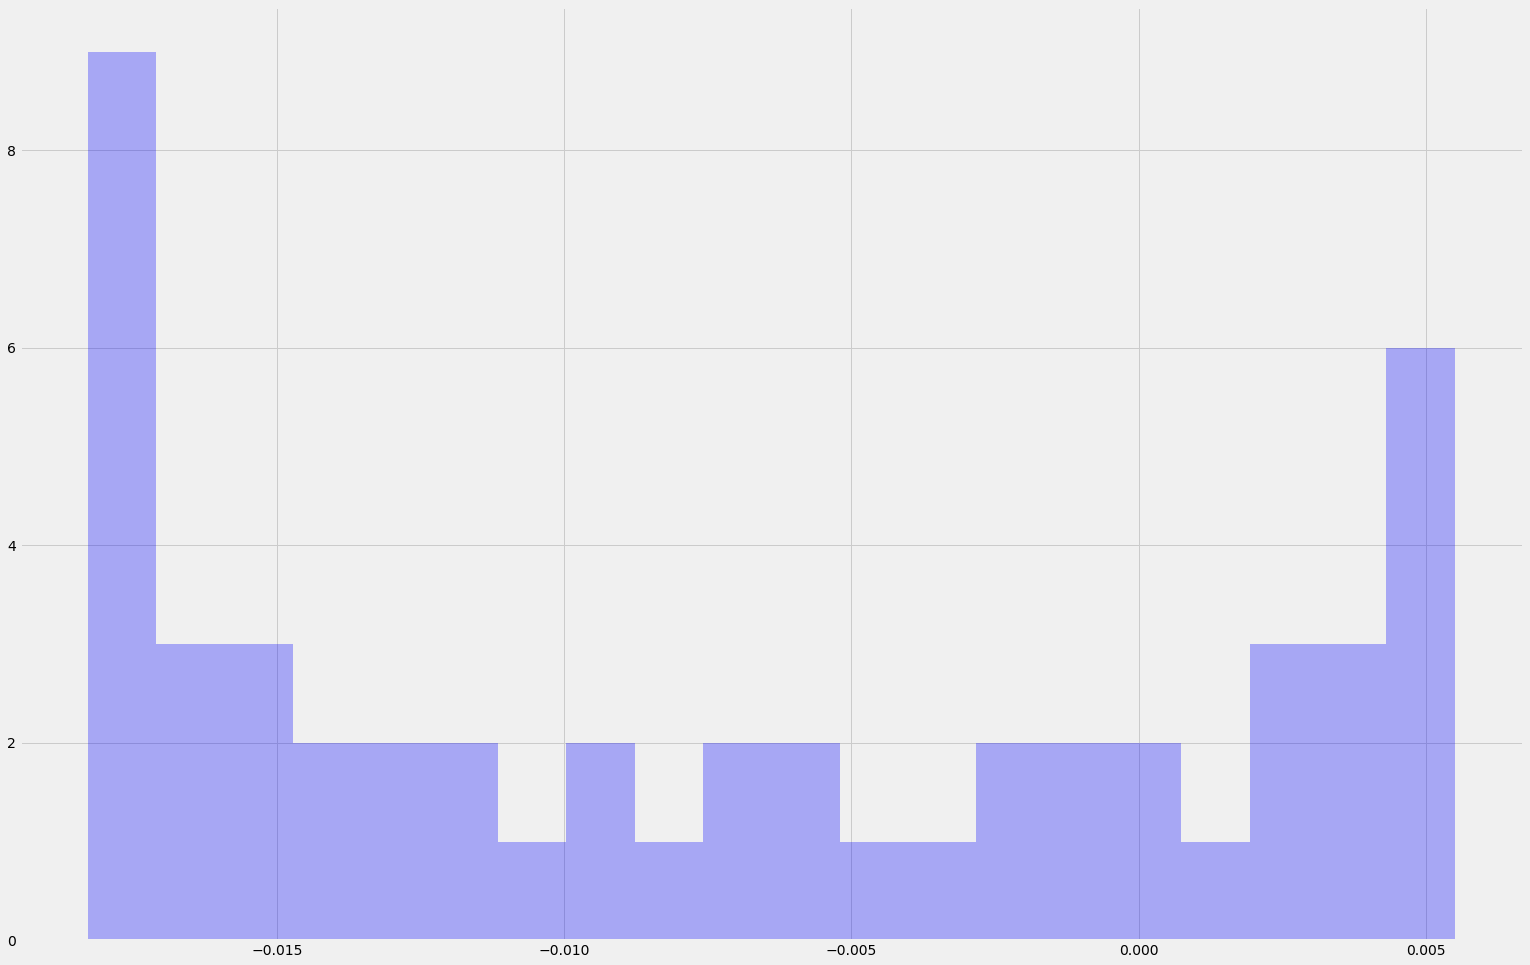

In [56]:
m = np.mean(xdif)
std = np.std(xdif)
    
fig1 = plt.figure()
plt.hist(xdif, alpha = 0.3, bins = 20, facecolor='blue', label = 'Mu2e Field')